In [1]:
import pandas as pd

In [2]:
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv?_sm_au_=iVVb0jDn0PSH4HSMRMpVsKQtC6Vvq"

In [3]:
df = pd.read_csv(url)

In [4]:
df.drop(columns=['Lat', 'Long'], inplace=True)

In [5]:
df.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20
0,NaN,Thailand,2,3,5,7,8,8,14,14,...,43,43,43,47,48,50,50,50,53,59
1,NaN,Japan,2,1,2,2,4,4,7,7,...,274,293,331,360,420,461,502,511,581,639
2,NaN,Singapore,0,1,3,3,4,5,7,7,...,108,110,110,117,130,138,150,150,160,178
3,NaN,Nepal,0,0,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,0,0,0,3,4,4,4,7,...,29,36,50,50,83,93,99,117,129,149


In [6]:
swiss = df[df["Country/Region"] == "Switzerland"].drop(columns=["Country/Region"]).stack().droplevel(level=0)

In [7]:
italy = df[df["Country/Region"] == "Italy"].drop(columns=["Country/Region"]).stack().droplevel(level=0)

In [8]:
france = df[(df["Country/Region"] == "France") & (df["Province/State"] == "France")].drop(columns=["Country/Region", "Province/State"]).stack().droplevel(level=0)

In [9]:
# france.drop(columns=["Country/Region"], inplace=True)

In [10]:
# france = france.stack().droplevel(level=0)

In [11]:
spain = df[df["Country/Region"] == "Spain"].drop(columns=["Country/Region"]).stack().droplevel(level=0)

In [12]:
germany =  df[df["Country/Region"] == "Germany"].drop(columns=["Country/Region"]).stack().droplevel(level=0)

In [13]:
austria =  df[df["Country/Region"] == "Austria"].drop(columns=["Country/Region"]).stack().droplevel(level=0)

In [14]:
df2 = pd.concat([swiss, italy, france, germany, austria, spain], axis=1)

In [15]:
df2.columns = ['Switzerland', 'Italy', 'France', 'Germany', 'Austria', 'Spain']

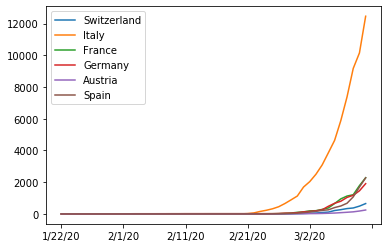

In [16]:
df2.plot()

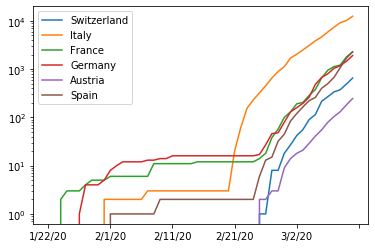

In [17]:
df2.plot(logy=True)

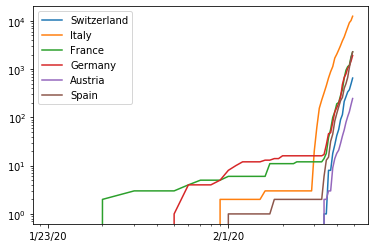

In [18]:
df2.plot(logy=True, logx=True)

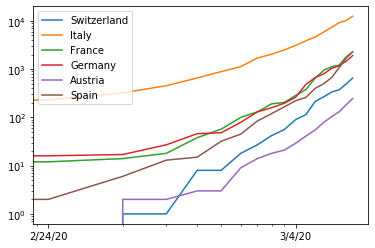

In [19]:
df2[32:].plot(logy=True, logx=True)

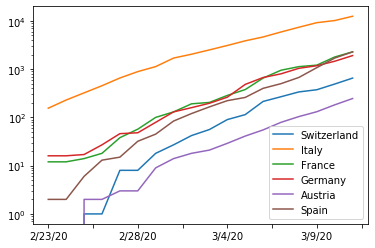

In [20]:
df2[32:].plot(logy=True)

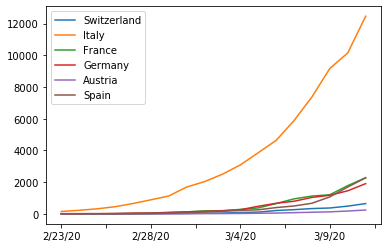

In [21]:
df2[32:].plot()

In [22]:
us = df[df["Country/Region"] == "US"].groupby(by=["Country/Region",]).sum().stack().droplevel(level=0)

In [23]:
us.head()

1/22/20    1
1/23/20    1
1/24/20    2
1/25/20    2
1/26/20    5
dtype: int64

In [24]:
df3 = pd.concat([df2, us], axis=1)

In [25]:
col = list(df3.columns)

In [26]:
col[col.index(0)] = 'US'

In [27]:
df3.columns = col

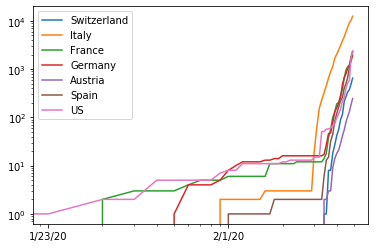

In [28]:
df3.plot(logy=True, logx=True)

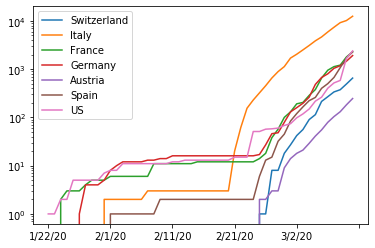

In [29]:
df3.plot(logy=True)

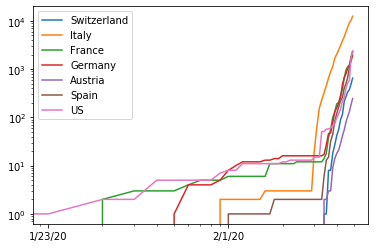

In [30]:
df3.plot(logy=True, logx=True)

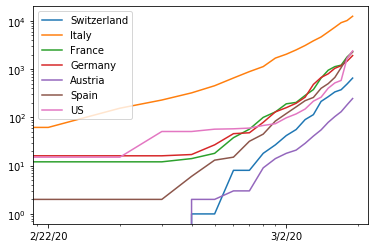

In [31]:
df3[30:].plot(logy=True, logx=True)

In [41]:
df4 = df.sum(axis=0)

In [43]:
df4.drop(index=['Country/Region'], inplace=True)

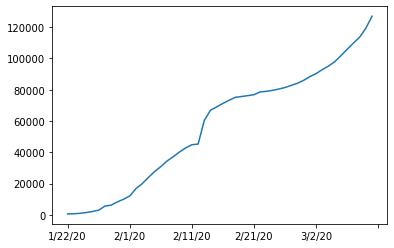

In [44]:
df4.plot()

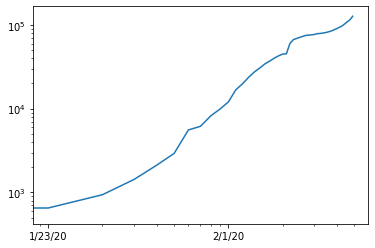

In [45]:
df4.plot(logy=True, logx=True)

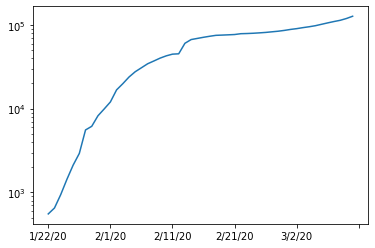

In [46]:
df4.plot(logy=True)